In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-review/movies.csv
/kaggle/input/sentiment-prediction-on-movie-review/sample.csv
/kaggle/input/sentiment-prediction-on-movie-review/train.csv
/kaggle/input/sentiment-prediction-on-movie-review/test.csv


# About Dataset
Sentiment Analysis on Movie reviews. Explore the dataset and build an ML model to predict sentiment of the review text. In this dataset each record represents a movie-review pair with movie title, description, genres, duration, director, actors, users' ratings, review text, reviewer name, etc. Your task is to build an ML model to predict sentiment of the review text.

# Files
train.csv - the training set containing the review sentiment along with other features.
test.csv - the test set, has review features, but no sentiment column, since it is the target.
movies.csv - the file with metadata on movies.

# Columns
movieid - named id of the movie
sentiment - indicating "POSITIVE" or "NEGATIVE", which is the target.

Other columns are self explanatory

**Data loading and Preprocessing**



Load your training dataset into your programming environment

Preprocessing refers to the initial steps and techniques applied to raw data before it can be used for analysis or fed into a machine learning model. The goal of data preprocessing is to clean, transform, and prepare the data in a way that makes it suitable and more effective for the specific task at hand.

In [2]:
import pandas as pd
#load the train_data into programing environment

train_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-review/train.csv")
train_data    #it the DataFrame of the train_data of sentimrent analysis.

#Total 5 Features--->  movieid, reviewerName, isFrequentReviewer, reviewText, sentiment

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE


In [3]:
#shape of the of train_data
train_data.shape  #total number of rows and column in training dataset.

(162758, 5)

In [4]:
#Total number of NULL Values in the data 
train_data.isnull().sum()   #how many null values are there in tain_data
        
#so as a result, there are 6447 null values in Feature "reviewText" of the train_data set.

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

**Load movie_data**:

Loading the meta_data (movie_data)

In [5]:
#load the meta data(movie_data)
movie_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-review/movies.csv")
movie_data

#Total 14 features in movie_data(meta-data)
#movieid, title, audienceScore, rating, ratingContents, releaseDateTheaters, releaseDateStreaming, runtimeMinutes, genre, originalLanguage, director, boxOffice, distributor, soundType

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN
143256,wonder_hermione_granger_hulk_v,Wonder Hermione Granger Hulk V,NaN,NaN,NaN,NaN,2006-11-21,63.0,Drama,English,Dwayne Clayton,NaN,NaN,NaN


In [6]:
#shape of the of movie_data
movie_data.shape  #total number of rows and column in movie dataset

(143258, 14)

**Remove duplicates** from movie data check for the duplicates in the movie_data set. There are total 143258 rows in which 16854 rows are the duplicates , so removing all the duplicates from the movie data set.

In [7]:
#checking for the duplicates in the movie_data 

# Similarly, for the 'movie_data' DataFrame
movie_data.drop_duplicates(subset='movieid', inplace=True)
movie_data 

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143252,james_bond_jason_bourne,James Bond Jason Bourne,NaN,NaN,NaN,NaN,2019-01-03,131.0,"Action, Mystery & thriller",Hindi,Reginald Davis,NaN,NaN,NaN
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN


In [8]:
#Total number of NULL Values in the movei_data 
movie_data.isnull().sum()                            #how many null values are there in movie_data
        
#so as a result, there are 62690 null values in Feature "audienceScore" of the movie_data set.
#114626  in "rating " , 114626 in "ratingContents"  and runtimeMinutes  in  12494   so ..

movieid                      0
title                        0
audienceScore            62690
rating                  114626
ratingContents          114626
releaseDateTheaters     100014
releaseDateStreaming     57131
runtimeMinutes           12494
genre                    10003
originalLanguage         12384
director                     0
boxOffice               113876
distributor             106858
soundType               112938
dtype: int64

**Mearge the data**
Merging the train_data with the movie_data on the basis of common column(movie_id).

So now we are performing left outer join in the datasets to merge both the data

storing the merge data in new DATAFRAME as data_df

In [9]:
data_df=pd.merge(train_data,movie_data,on='movieid',how='left') #applying the merge on train_data and movie_data by left outer join
data_df

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE,The Joker Ethereal Captain Jack Sparrow Fantastic,NaN,NaN,NaN,NaN,2004-01-06,96.0,Romance,English,Gertrude Fonner,NaN,NaN,NaN
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE,E.T. Hannibal Lecter Vito Corleone Katniss Eve...,20.0,PG-13,"['Crude and Sexual Content', 'Brief Strong Lan...",2016-02-12,2016-05-24,102.0,"Comedy, Adventure",English,Susan Oley,$28.8M,Paramount Pictures,NaN
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE,Infinite Enigma Luke Skywalker,78.0,PG-13,"['Some Language', 'Suggestive References']",NaN,2022-06-17,90.0,"Comedy, Drama",English,Bryant Reams,NaN,NaN,Dolby Digital
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE,Emerald Oracle Iron Man Wolverine,39.0,NaN,NaN,1996-11-16,1998-11-03,88.0,"Kids & family, Holiday, Comedy",English,Lisa Cruz,$60.6M,20th Century Fox,Surround


In [10]:
#shape of the of merge_data
data_df.shape #total number of rows and columns in merge dataset.

(162758, 18)

In [11]:
#Total number of NULL Values in the merge_data 
data_df.isnull().sum()   #how many null values are there in merge_data

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText               6447
sentiment                   0
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
boxOffice               52776
distributor             40663
soundType               85367
dtype: int64

# ****Exploratory Data Analysis (EDA)
EDA stands for Exploratory Data Analysis. It is a critical step in the data analysis process that involves examining and visualizing data sets to understand their main characteristics, patterns, and relationships. The primary goal of EDA is to gain insights, detect anomalies, and inform the data modeling process.

# 1. Summarize Data:
This involves calculating descriptive statistics such as mean, median, mode, standard deviation, and other relevant measures to understand the central tendency and spread of the data.

In [12]:
data_df.head()    #provides the overview of the merge_data

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [13]:
#information about the merge dataset 
data_df.info()     #There are total 18 features
                  #"isFrequentReviewer" is of Dtype "bool"
                 #"audienceScore" & "runtimeMinutes"  are of Dtype "float"
                # Rest of the 15 Features are of Dtype "object"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

In [14]:
data_df.describe()   #The data.describe method provides a statistical summary 
                    #of the numerical columns in the data DataFrame

,audienceScore,runtimeMinutes
count,149510.000000,159382.000000
mean,65.214541,106.911828
std,19.937695,22.138131
min,0.000000,4.000000
25%,51.000000,93.000000
50%,68.000000,104.000000
75%,82.000000,118.000000
max,100.000000,561.000000


# 2. Handling missing values
Handling missing values refers to the process of dealing with data points or entries that are not available or are marked as "NaN" (Not a Number) in a dataset. Missing values can occur for various reasons, such as data collection errors, data corruption, or data not being available for certain observations.

Imputation : Imputation is the process of filling in missing values in a dataset with estimated or predicted values. Various imputation techniques are used to handle missing data, and the choice of technique depends on the nature of the data and the specific analysis or modeling task.(strategy : Mean, Median ,Mode and Constant)

# Simple Imputer for reviewText

In this code, we use the 'most_frequent' strategy, which means the missing values in the 'reviewText' column will be replaced with the most frequent (mode) value in that column.

This strategy is appropriate for categorical columns like 'reviewText'.

In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [16]:
data_df['reviewText']

0         Henry Selick’s first movie since 2009’s Corali...
1         With a cast that reads like the Vogue Oscar pa...
2         Creed II does not give us anything but another...
3         I know what you're thinking, but this is no Li...
4         Director Fernando Meirelles tells the story wi...
                                ...                        
162753    A top-notch thriller with genuine surprises an...
162754    Some people find Derek Zoolander funny and lik...
162755    This fun, gentle comedy focuses mainly on them...
162756    The film is rescued by a strong third act, but...
162757            A peerless exercise in stimulus response.
Name: reviewText, Length: 162758, dtype: object

In [17]:


import pandas as pd
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with 'mode' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in the 'reviewText' column with the mode
data_df['reviewText'].values.reshape(-1, 1)
#data_df['reviewText'] = imputer.fit_transform(a)

# Check the DataFrame after imputation
data_df['reviewText']

0         Henry Selick’s first movie since 2009’s Corali...
1         With a cast that reads like the Vogue Oscar pa...
2         Creed II does not give us anything but another...
3         I know what you're thinking, but this is no Li...
4         Director Fernando Meirelles tells the story wi...
                                ...                        
162753    A top-notch thriller with genuine surprises an...
162754    Some people find Derek Zoolander funny and lik...
162755    This fun, gentle comedy focuses mainly on them...
162756    The film is rescued by a strong third act, but...
162757            A peerless exercise in stimulus response.
Name: reviewText, Length: 162758, dtype: object

# Simple Imputer for audienceScore.

In this code, we use the 'mean' strategy, which means the missing values in the 'audienceScore' column will be replaced with mean value in that column.

This strategy is appropriate for numerical columns like 'audienceScore'.

In [18]:
# Create a SimpleImputer instance with the strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# # Convert the 'audienceScore' column to numeric (in case it's stored as string)
# data_df['audienceScore'] = pd.to_numeric(data_df['audienceScore'], errors='coerce')

# Impute the missing values in the 'audienceScore' column with the mean
data_df['audienceScore'] = imputer.fit_transform(data_df['audienceScore'].values.reshape(-1, 1))

# The missing values in 'audienceScore' have been imputed with the mean
data_df['audienceScore']

0         65.000000
1         65.214541
2         80.000000
3         65.214541
4         97.000000
            ...    
162753    65.214541
162754    20.000000
162755    78.000000
162756    39.000000
162757    57.000000
Name: audienceScore, Length: 162758, dtype: float64


# Simple Imputer for runtimeMinutes
In this code, we use the 'mean' strategy, which means the missing values in the 'rating' column will be replaced with the mean value in that column.

This strategy is appropriate for numerical columns like 'runtimeMinutes'.

In [19]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with the strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Convert the 'runtimeMinutes' column to numeric (in case it's stored as string)
data_df['runtimeMinutes'] = pd.to_numeric(data_df['runtimeMinutes'], errors='coerce')

# Impute the missing values in the 'runtimeMinutes' column with the mean
data_df['runtimeMinutes'] = imputer.fit_transform(data_df['runtimeMinutes'].values.reshape(-1, 1))
data_df['runtimeMinutes']
# The missing values in 'runtimeMinutes' have been imputed with the mean

0         105.0
1          91.0
2         130.0
3          15.0
4         131.0
          ...  
162753     96.0
162754    102.0
162755     90.0
162756     88.0
162757     86.0
Name: runtimeMinutes, Length: 162758, dtype: float64

# 3. Visualisation and Insights****

**Data Visualisation**: Data visualization refers to the graphical representation of data and information using visual elements such as charts, graphs, and maps. The primary goal of data visualization is to present complex datasets in a visually appealing and easy-to-understand format. By using various visualization techniques, patterns, trends, relationships, and insights can be quickly identified and communicated to both technical and non-technical audiences.

**Data Insights**: Data insights are valuable information and observations gained from analyzing data. Insights are often derived by exploring and interpreting data, identifying patterns, trends, relationships, or outliers that provide a deeper understanding of the underlying information.

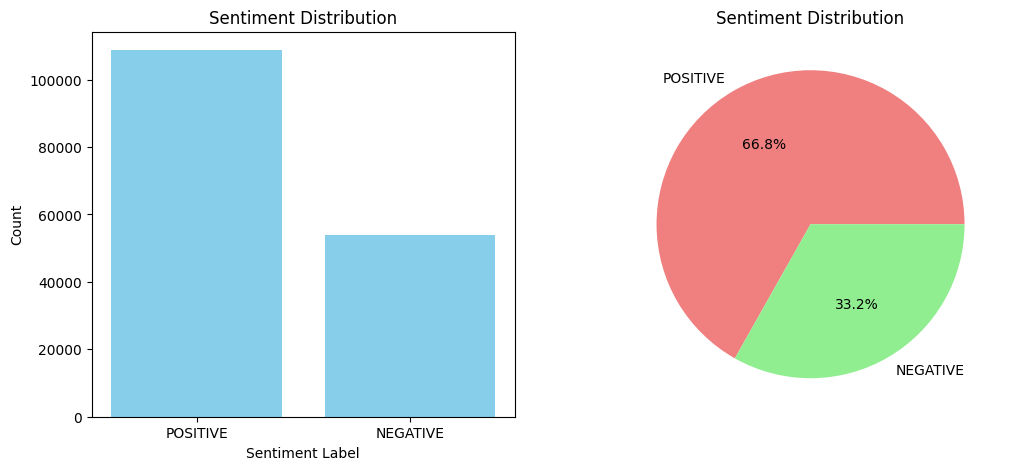

sentiment
POSITIVE    108761
NEGATIVE     53997
Name: count, dtype: int64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment label
sentiment_counts = data_df['sentiment'].value_counts()


# Create a figure with two subplots: one for the bar chart and one for the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the bar chart on the first subplot (ax1)
ax1.bar(sentiment_counts.index, sentiment_counts.values, color="skyblue")
ax1.set_xlabel('Sentiment Label')
ax1.set_ylabel('Count')
ax1.set_title('Sentiment Distribution')

# Plot the pie chart on the second subplot (ax2)
ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=["lightcoral", "lightgreen", "lightblue"])
ax2.set_title('Sentiment Distribution')

# Adjust layout and show the plot
#plt.tight_layout()
plt.show()
sentiment_counts

From the above sentiment distribution , we came to know that the total number of POSITIVE sentiments are 108761 and total number of the NEGATIVE sentiments are 53997 .

In the above BAR chart it shows that the POSITIVE sentiments are twice more than the negative sentiments . In the above PIE chart it visualise us that the 66.8% of sentimnets in the merge_data are the POSTIVE sentiments and rest 33.2% of the sentiments are NEGATIVE sentiments.

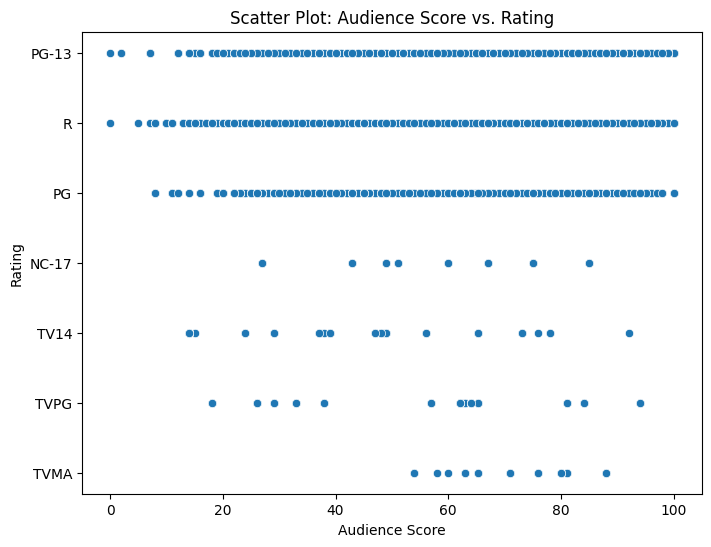

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'merge_data' DataFrame with 'audienceScore' and 'rating' columns

# Create a scatter plot between 'audienceScore' and 'rating'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='audienceScore', y='rating', data=data_df)
plt.xlabel('Audience Score')
plt.ylabel('Rating')
plt.title('Scatter Plot: Audience Score vs. Rating')
plt.show()

The above** Scatter plot** shows the corelation between Rating and *AudienceScore *.

As we observe from the plot that the Ratings

**PG-13** (Parental Guidance - 13 years and above)
**TVPG** (TV Parental Guidance)
**R** (Restricted)
**PG** (Parental Guidance)
**NC-17** (No Children 17 and Under Admitted)
**TV-14** (TV 14 years and above)
**TV-MA** (TV Mature Audience)
**R* **rating is the most frequent type of movie , there is a vast variety of aduienceScore for that , where as for TV-MA very less specific aduienceScore are given .

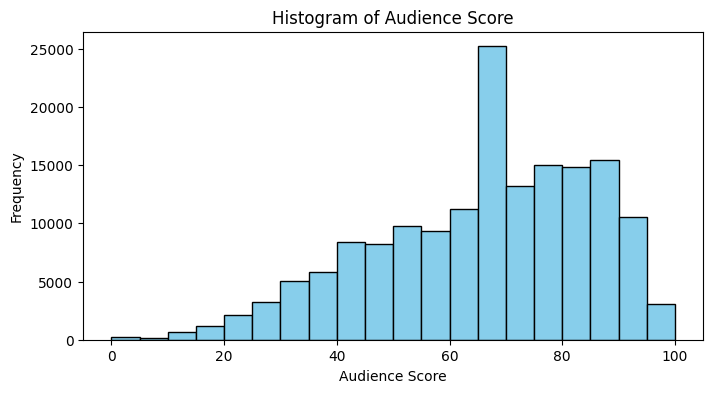

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'merge_data' DataFrame with 'audienceScore' column

# Create a histogram for 'audienceScore'
plt.figure(figsize=(8, 4))
plt.hist(data_df['audienceScore'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Audience Score')
plt.ylabel('Frequency')
plt.title('Histogram of Audience Score')
plt.show()

The above Histogram of Audience Score shows the frequency of scores given by the Audience in the merge_data.

So what we observe from the above histogram that the Frequnecy for the rating between 65-70 is maximum and is an Imbalanced Rating Distribution or the audience is polarised, giving the rating as at **medium(65-70)** for all the movies.

So this above histogram helps us to know that the mean value that we added in** SIMPLE IMPUTER **to the 'audienceScore' is in range of (65-70).

In [49]:
import plotly.express as px
gapminder = px.data.gapminder()
fig = px.scatter(gapminder.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

# 4. Feature Scailing
(Feature Engineering process)

Feature scaling, also known as data normalization, is a preprocessing technique used to transform numerical features in a dataset to a similar scale (fixed range) .The goal of feature scaling is to ensure that all features contribute equally to the analysis or machine learning models, regardless of their original unit or magnitude.

1.MinMaxScaler
2.MaxAbs Scailing
3.StandardScaler

# **MinMaxScalar**
'audienceScore' Feature

In this data transformation step, we will preprocess the 'audienceScore' feature to make it suitable for analysis. The 'audienceScore' represents the audience rating for a particular movie and is of numerical type. We will perform Min-Max Scaling on this feature to normalize the values within a specific range.

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Extract the 'audienceScore' column
audience_score = data_df['audienceScore'].values.reshape(-1, 1)
#The .values attribute converts the column data into a NumPy array.
#The .reshape(-1, 1) part is used to reshape the 1-dimensional array into a 2-dimensional array with a single column,(require by MinmaxScaler)

# Create a MinMaxScaler object
scaler = MinMaxScaler()     #creating instance of the class

# Fit and transform the 'audienceScore' column
scaled_audience_score = scaler.fit_transform(audience_score)
#The result will be a new array (scaled_audience_score) containing the scaled values in the range [0, 1], 

print(scaled_audience_score)

[[0.65      ]
 [0.65214541]
 [0.8       ]
 ...
 [0.78      ]
 [0.39      ]
 [0.57      ]]


In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a data frame 'data_df' with the 'runtimeMinutes' column

# Extract the 'runtimeMinutes' column
runtime_minutes = data_df['runtimeMinutes'].values.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the 'runtimeMinutes' column
scaled_runtime_minutes = scaler.fit_transform(runtime_minutes)

print(scaled_runtime_minutes)

[[0.18132855]
 [0.1561939 ]
 [0.22621185]
 ...
 [0.15439856]
 [0.1508079 ]
 [0.14721724]]


# **DATA PREPROCESSING**
Data preprocessing is a crucial and fundamental step in the data analysis and machine learning pipeline. It involves the cleaning, transforming, and organizing of raw data to make it suitable and more effective for analysis and modeling. The quality of data preprocessing directly impacts the accuracy, reliability, and performance of subsequent data analysis or machine learning algorithms.

# **Data Cleaning**
This step involves identifying and handling missing, incorrect, or inconsistent data. Missing data can be imputed or removed, and outliers or noisy data points may be addressed.

Cleaing the reviewText by following methods:

* Tokenization
* Remove Numerical Values
* Removing Short Words
* Removing Urls
* Remove Special Characters
* Lower-Case
* Remove Punctuation
* Negations_handling

In [42]:
#Tokenization:

data_df['reviewText']=data_df['reviewText'].astype(str)
#tokenization usually requires the data to be in string format.

#Split the text into individual words or tokens.
def tokenize_text(reviewText):
    return reviewText.split()

data_df['reviewText']=data_df['reviewText'].apply(tokenize_text)

In [43]:
#Numerical Values:Numerical Values:
import re
# Ensure the 'text' column is of string data type
data_df['reviewText'] = data_df['reviewText'].astype(str)

def remove_numerical_values(reviewText):
    return re.sub(r'\d+', '', reviewText)

data_df['reviewText'] = data_df['reviewText'].apply(remove_numerical_values)

In [44]:
#Removing Short Words:

def remove_short_words(reviewText, min_word_length=3):
    # Use regex to remove words with lengths less than min_word_length
    return re.sub(r'\b\w{1,' + str(min_word_length - 1) + r'}\b', '', reviewText)
#re.sub() method to replace numerical values with an empty string ('').
#This part matches a word with a length of 1 to min_word_length - 1 characters. The \w represents a word character 

# Example usage:

data_df['reviewText'] =data_df['reviewText'].apply(remove_short_words)

In [45]:
#URL  remove:
def remove_urls(reviewText):
    return re.sub(r'&\S#\Shttp\S+|www\S+|https\S+', '', reviewText)
#This part of the pattern matches URLs that might have special characters before "http://" or "https://"

data_df['reviewText'] = data_df['reviewText'].apply(remove_urls)

In [46]:
def remove_special_chars1(reviewText):
    return re.sub(r'&#;&#;', '', reviewText)

# Function to remove special characters ' '," ' "
def remove_special_chars2(reviewText):
    return re.sub(r" ' \", ' ", '', reviewText)
def remove_empty_spaces(reviewText):
    return reviewText.strip('')

data_df['reviewText'] = data_df['reviewText'].apply(remove_special_chars1)
data_df['reviewText'] = data_df['reviewText'].apply(remove_special_chars2)
data_df['reviewText'] = data_df['reviewText'].apply(remove_empty_spaces)

# **Pipeline :**
A pipeline refers to a sequence of data processing steps that are chained together to automate and streamline the data transformation and modeling process. The pipeline described in the provided code is a custom pipeline composed of several text preprocessing steps.

In [30]:
import pandas as pd
import re
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# A transformer is an object that performs a specific transformation on the input data and returns the transformed data.

sentiment_dict = {":)": "positive",":(": "negative",":-)": "positive",":-(": "negative", }

preprocessor = Pipeline([
     ('check_null', FunctionTransformer(lambda x: x.fillna(''))),
    ('lowercase', FunctionTransformer(lambda x: x.apply(lambda text: text.lower()))),
    ('remove_punctuation', FunctionTransformer(lambda x: x.apply(lambda text: text.replace('[^a-zA-Z0-9\s]', '')))),
    ('stopwords_removal', FunctionTransformer(lambda x: [word for word in x if word not in ENGLISH_STOP_WORDS])),
     ('negations_handling', FunctionTransformer(lambda x: ['not_' + word if x[i - 1] in ['not', 'no', "n't", 'never'] else word for i, word in enumerate(x)])),
    ('sentiment_labels', FunctionTransformer(lambda x: [f"{sentiment_dict[word]}_{word}" if word in sentiment_dict else word for word in x])),  
])

data_df['reviewText']= preprocessor.fit_transform(data_df['reviewText'])
data_df['reviewText']

0         ['henry', 'selick’', 'first', 'movie', 'since'...
1         ['with', '', 'cast', 'that', 'reads', 'like', ...
2         ['creed', '', 'does', 'not', 'give', '', 'anyt...
3         ['', 'know', 'what', "you'", 'thinking,', 'but...
4         ['director', 'fernando', 'meirelles', 'tells',...
                                ...                        
162753    ['', 'top-notch', 'thriller', 'with', 'genuine...
162754    ['some', 'people', 'find', 'derek', 'zoolander...
162755    ['this', 'fun,', 'gentle', 'comedy', 'focuses'...
162756    ['the', 'film', '', 'rescued', '', '', 'strong...
162757    ['', 'peerless', 'exercise', '', 'stimulus', '...
Name: reviewText, Length: 162758, dtype: object

In [31]:
data_df.isnull().sum()

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText                  0
sentiment                   0
title                       0
audienceScore               0
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes              0
genre                    2438
originalLanguage         3290
director                    0
boxOffice               52776
distributor             40663
soundType               85367
dtype: int64

In [32]:
#merge_data['sentiment'] contains the setiment ['positive','negative']
y=data_df['sentiment']
y

0         POSITIVE
1         NEGATIVE
2         POSITIVE
3         POSITIVE
4         POSITIVE
            ...   
162753    POSITIVE
162754    NEGATIVE
162755    POSITIVE
162756    NEGATIVE
162757    POSITIVE
Name: sentiment, Length: 162758, dtype: object

# **Data Transformation:**
Data transformation is a crucial step in the data preprocessing phase of a machine learning pipeline. It involves converting raw data into a suitable format for analysis and modeling. Data transformation can include a wide range of operations, each designed to address specific data-related challenges or enhance the performance of machine learning models.

Encoding on Categorical Features

**One Hot Encoding**

**Label Encoding**

**Ordinal Encoding**

**TfidfVectorizer , countVectorizer on Textdata**

**TF-IDF (Term Frequency-Inverse Document Frequency)**
It is a technique that aims to capture the importance of words in a document relative to a collection of documents. TF-IDF is based on the idea that the importance of a word in a document increases with its frequency in the document (Term Frequency) and decreases with its frequency across all documents in the collection (Inverse Document Frequency).

Term Frequency measures how frequently a term (word) appears in a document. Inverse Document Frequency measures how important a term is by considering its rarity across all documents in the collection.

It is useful **data transformer** for the **'reviewText'** feature in sentiment analysis tasks

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()  # You can adjust max_features as per your needs

# Transform 'reviewText' using TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(data_df['reviewText'])
tfidf_matrix

# tfidf_matrix contains the transformed 'reviewText' as a sparse matrix

<162758x64157 sparse matrix of type '<class 'numpy.float64'>'
	with 2606536 stored elements in Compressed Sparse Row format>

In [34]:
from scipy.sparse import hstack

# Concatenate scaled 'audienceScore' and 'runtimeMinutes' arrays with the TF-IDF sparse matrix
tfidf_matrix = hstack((scaled_audience_score, scaled_runtime_minutes, tfidf_matrix))

# **MODEL TRAINING**
Hyper Parameter tuning :Hyperparameter tuning, also known as hyperparameter optimization, is the process of finding the best set of hyperparameters for a machine learning model to achieve optimal performance on a given dataset

**There are two main hyperparameter tuning techniques**:

1.GridSearchCV
2.RandomizedSearchCV

GridSearchCV is an exhaustive hyperparameter tuning technique that performs a grid search over all possible combinations of hyperparameters. and it tries every possible combination of those hyperparameters.For each combination, it trains the model using cross-validation on the training data and evaluates the performance on the validation set.

*RandomizedSearchCV* is a more efficient hyperparameter tuning technique compared to GridSearchCV. Instead of exhaustively searching all possible combinations, RandomizedSearchCV samples a fixed number of random combinations of hyperparameters from a predefined distribution.



* 1. Data splitting for model training and evaluation

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.3, random_state=42)

# 1. LogisticRegression Model
The Logistic Regression model calculates the probability that an instance belongs to a specific class (e.g., class 1) based on its features. The predicted probability is then converted into a binary decision (class 0 or 1) using a threshold.

In [36]:
baseline_model = LogisticRegression(max_iter=1000)

#Hyperparameter tuning
param_grid = {'C': [0.1, 1]}
grid_search = GridSearchCV(baseline_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

baseline_model = grid_search.best_estimator_
baseline_model=grid_search.fit(X_train, y_train)
#baseline_model.fit(X_train, y_train)
# Model evaluation
y_pred = baseline_model.predict(X_test)  # Evaluate on a smaller sample
print("Baseline Model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Baseline Model:
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.61      0.68     16201
    POSITIVE       0.82      0.91      0.86     32627

    accuracy                           0.81     48828
   macro avg       0.79      0.76      0.77     48828
weighted avg       0.80      0.81      0.80     48828

[[ 9849  6352]
 [ 3001 29626]]


# ROC & AUC
Receiver Operating Characteristic (ROC) curve and the Area Under the ROC Curve (AUC) widely used evaluation metrics for binary classification models. They help assess the performance of the model and its ability to discriminate between the two classes effectively.

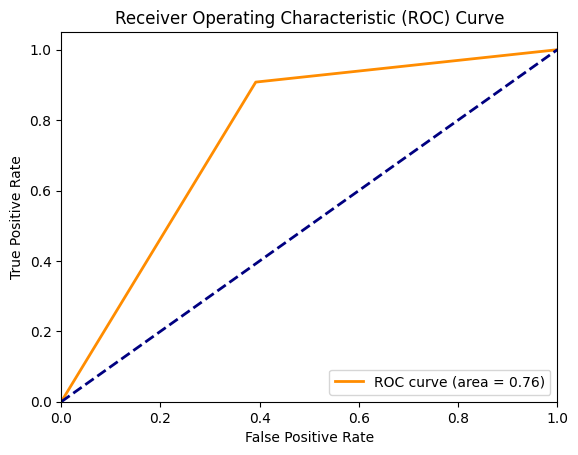

AUC Score: 0.757973200466758


In [37]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
y_test_binary = np.where(y_test == 'POSITIVE', 1, 0)
y_pred_binary = np.where(y_pred == 'POSITIVE', 1, 0)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)

# 2. Linear SVC Model
The Linear SVC (Support Vector Classification) model used for binary and multi-class classification tasks. It is particularly suited for situations where the data is linearly separable or can be transformed into a linearly separable form.

In [38]:
from sklearn.svm import LinearSVC

#LinearSVC with default hyperparameters
linearSCV_model = LinearSVC()

# Hyperparameter tuning using GridSearchCV for LinearSVC
param_grid = {'C': [0.1, 1]}
grid_search = GridSearchCV(linearSCV_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV for LinearSVC
linear_model = grid_search.best_estimator_

# Model evaluation for LinearSVC
y_pred = linear_model.predict(X_test)
print("LinearSVC Model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

LinearSVC Model:
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.60      0.68     16201
    POSITIVE       0.82      0.91      0.86     32627

    accuracy                           0.81     48828
   macro avg       0.80      0.76      0.77     48828
weighted avg       0.81      0.81      0.80     48828

[[ 9768  6433]
 [ 2891 29736]]


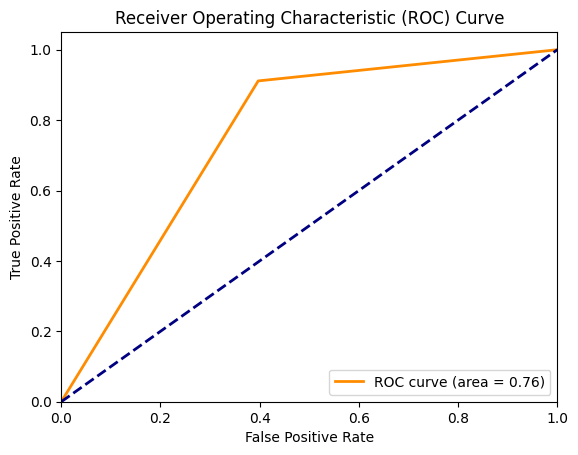

AUC Score: 0.7571590751938269


In [39]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
y_test_binary = np.where(y_test == 'POSITIVE', 1, 0)
y_pred_binary = np.where(y_pred == 'POSITIVE', 1, 0)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)

# 3. MultinomialNB ModeL
The Multinomial Naive Bayes (MultinomialNB) model is a probabilistic classification algorithm based on Bayes' theorem. It is primarily used for text classification tasks and is well-suited for datasets with discrete features, such as word counts in text data.

The model calculates the probability of an instance belonging to each class based on the frequency of features in the training data. It then predicts the class with the highest probability as the output class for the instance.

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create the Multinomial Naive Bayes model
mnb_model = MultinomialNB()

# Hyperparameter tuning
param_grid = {
    'alpha': [0.1, 1.0, 2.0]
}

grid_search = GridSearchCV(mnb_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

mnb_model = grid_search.best_estimator_

# Model evaluation
y_pred = mnb_model.predict(X_test)  # Evaluate on a smaller sample
print("Multinomial Naive Bayes Model:")
print(classification_report(y_test, y_pred))
cnf=confusion_matrix(y_test, y_pred)
print(cnf)

Multinomial Naive Bayes Model:
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.46      0.58     16201
    POSITIVE       0.78      0.93      0.85     32627

    accuracy                           0.78     48828
   macro avg       0.78      0.70      0.71     48828
weighted avg       0.78      0.78      0.76     48828

[[ 7499  8702]
 [ 2193 30434]]


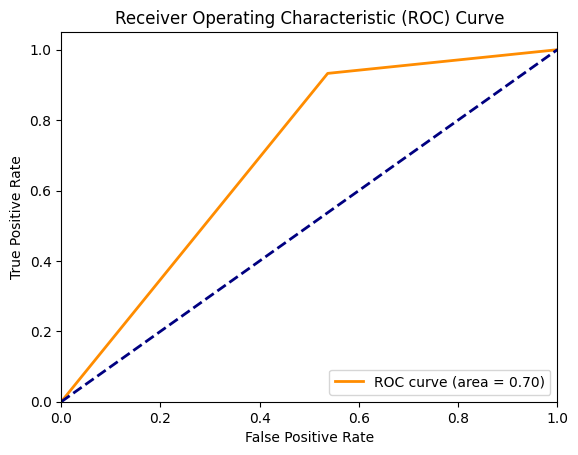

AUC Score: 0.6978291958958961


In [41]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
y_test_binary = np.where(y_test == 'POSITIVE', 1, 0)
y_pred_binary = np.where(y_pred == 'POSITIVE', 1, 0)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)